In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os



import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox



from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# This one is only available in the development verison of statsmodels
# Run:
#    pip install git+https://github.com/statsmodels/statsmodels.git
# to install the development version.
from statsmodels.tsa.statespace.sarimax import SARIMAX


# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_score

from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor


from scipy import signal
from scipy import stats

sys.path.append("..")
from eda_utilities import print_eda_stats
from data_pipeline import dockless_data_pipeline
from data_pipeline import weather_data_pipeline
from data_pipeline import find_top_group_by_column_list
from data_pipeline import prepare_cell_data

In [10]:
dockless_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv")
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")
# Call the dockless_data_pipeline()
dockless_data = dockless_data_pipeline(dockless_data)
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2746505   |    2746505    |   2746505    |         0         |
|        Device ID         |  object |   2746505   |     26999     |   2746505    |         0         |
|       Vehicle Type       |  object |   2746504   |       3       |   2746505    |         1         |
|      Trip Duration       | float64 |   2746504   |     10521     |   2746505    |         1         |
|      Trip Distance       | float64 |   2746504   |     16125     |   2746505    |         1         |
|        Start Time        |  object |   2746504   |     25694     |   2746505    |         1         |
|         End Time         |  object |   2746504   |     25768  

In [8]:
#Read the weather data from S3 bucket
weather_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv")
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")
weather_data = weather_data_pipeline(weather_data)
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")


+-----------------+---------+-------------+---------------+--------------+-------------------+
|   Column Name   |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-----------------+---------+-------------+---------------+--------------+-------------------+
|     STATION     |  object |     436     |       1       |     436      |         0         |
|       NAME      |  object |     436     |       1       |     436      |         0         |
|     LATITUDE    | float64 |     436     |       1       |     436      |         0         |
|    LONGITUDE    | float64 |     436     |       1       |     436      |         0         |
|    ELEVATION    | float64 |     436     |       1       |     436      |         0         |
|       DATE      |  object |     436     |      436      |     436      |         0         |
|       AWND      | float64 |     435     |       73      |     436      |         1         |
| AWND_ATTRIBUTES |  object |     435     |       

In [ ]:
# Retrieve the top 10 origin cell IDs
top_10_origin_cell = find_top_group_by_column_list(dockless_data, 'Origin Cell ID', 'Trip Duration', 'count', n=10)

In [9]:
dockless_data

,AVG_DAILY_WIND_SPEED,PRECIPITATION,SNOW,AVG_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
DATE,,,,,,
2018-01-01,16.78,0.00,0.0,28.0,32.0,24.0
2018-01-02,10.74,0.00,0.0,29.0,32.0,23.0
2018-01-03,3.13,0.00,0.0,31.0,56.0,15.0
2018-01-04,2.68,0.00,0.0,36.0,54.0,22.0
2018-01-05,4.47,0.00,0.0,49.0,61.0,35.0
2018-01-06,4.47,0.00,0.0,45.0,64.0,29.0
2018-01-07,10.29,0.00,0.0,59.0,70.0,53.0
2018-01-08,11.18,0.00,0.0,60.0,69.0,36.0
2018-01-09,2.91,0.00,0.0,48.0,70.0,31.0


In [78]:
origin_cell_data = dockless_data[['Origin Cell ID', 'count']]

# Hardcoded Cell ID '014391'
ind_cell_data = origin_cell_data[origin_cell_data['Origin Cell ID'] == '014391']

trip_counts_cell = ind_cell_data.groupby([ind_cell_data.index.get_level_values(0),'Origin Cell ID']).count()
trip_counts_cell = trip_counts_cell.unstack(level=1)
trip_counts_cell = trip_counts_cell.fillna(0)

# # Make a regular dataframe for processing the Time Series
t2 = trip_counts_cell.reset_index()['count']
# Hardcoded Cell ID '014391'
counts = t2['014391'].values
data = {'Start Time':trip_counts_cell.index.values, 'Trip Counts':counts} 
trip_counts_cell_data = pd.DataFrame(data)
trip_counts_cell_data = trip_counts_cell_data.set_index("Start Time")

# Remove the data which is inconsistent 
trip_counts_cell_data = trip_counts_cell_data[(trip_counts_cell_data.index > '2018-07-15')]
trip_counts_cell_data = trip_counts_cell_data[(trip_counts_cell_data.index < '2019-01-15')]


In [80]:
data_cell_data_hour = trip_counts_cell_data.resample('H', how='sum')
data_cell_data_hour = data_cell_data_hour.fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [81]:
# Do the resampling before you add all the features

data_cell_data_hour['MONTH'] = pd.DatetimeIndex(data_cell_data_hour.index).month
data_cell_data_hour['YEAR'] = pd.DatetimeIndex(data_cell_data_hour.index).year
data_cell_data_hour['HOUR'] = pd.DatetimeIndex(data_cell_data_hour.index).hour
data_cell_data_hour['DAY'] = pd.DatetimeIndex(data_cell_data_hour.index).day
data_cell_data_hour['WEEK'] = pd.DatetimeIndex(data_cell_data_hour.index).week
data_cell_data_hour['DAY_OF_WEEK'] = pd.DatetimeIndex(data_cell_data_hour.index).weekday
data_cell_data_hour['WEEKEND'] = ((pd.DatetimeIndex(data_cell_data_hour.index).weekday) // 5 == 1).astype(float)
data_cell_data_hour['WEEKDAY'] = ((pd.DatetimeIndex(data_cell_data_hour.index).weekday) // 5 == 0).astype(float)
data_cell_data_hour['DATE'] = pd.DatetimeIndex(data_cell_data_hour.index).date
hours=[0, 6, 10, 15, 19, 23]
data_cell_data_hour['HOUR_LABEL'] = pd.cut(data_cell_data_hour['HOUR'], hours, include_lowest=True, right=True, labels=['0', '1', '2', '3', '4'])


#data_cell_data_hour.head(5)

In [82]:
# Add Weather Data 
data_cell_data_hour = data_cell_data_hour.reset_index().merge(weather_data, on='DATE', how="left").set_index('Start Time')
#data_cell_data_hour.head(5)

# Drop DATE, level_0, index columns
#data_014706_2_hour = data_014706_2_hour.drop(['DATE', 'index', 'level_0'], axis=1)



In [83]:
data_cell_data_hour = data_cell_data_hour.drop(['DATE'], axis=1)

In [84]:
data_cell_data_hour.columns

Index(['Trip Counts', 'MONTH', 'YEAR', 'HOUR', 'DAY', 'WEEK', 'DAY_OF_WEEK',
       'WEEKEND', 'WEEKDAY', 'HOUR_LABEL', 'AVG_DAILY_WIND_SPEED',
       'PRECIPITATION', 'SNOW', 'AVG_TEMPERATURE', 'MAX_TEMPERATURE',
       'MIN_TEMPERATURE'],
      dtype='object')

In [85]:
# Create the test train split the same way as the univariate time series so this is the same as ARIMA series
size = int(len(data_cell_data_hour) * 0.66)
train, test = data_cell_data_hour[0:size], data_cell_data_hour[size:len(data_cell_data_hour)]


In [86]:
y_train = train.pop('Trip Counts').values
X_train = train.values
y_test = test.pop('Trip Counts').values
X_test = test.values


In [87]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    score = model.score(test_features, test_labels)
    print('Model Performance')
    print("Mean Square Error:", mean_squared_error(test_labels, predictions))
    print("Mean Absoulute Error:", mean_absolute_error(test_labels, predictions))
    print("Score:", score)
    return score

In [88]:
best_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

best_rf.fit(X_train, y_train)
best_random_forest_accuracy = evaluate(best_rf, X_test, y_test)

Model Performance
Mean Square Error: 3.574113108151334
Mean Absoulute Error: 1.1456768083439344
Score: 0.4362651367663193


In [89]:
best_rf_predictions = best_rf.predict(X_test)

In [90]:
#train.head(5)

In [91]:
for i,j in  zip(train.columns.tolist(), best_rf.feature_importances_):
    print(i, ":", j)

MONTH : 0.0188983959887709
YEAR : 0.0
HOUR : 0.395868022714918
DAY : 0.048621382352457845
WEEK : 0.044670349690878346
DAY_OF_WEEK : 0.046236815328283824
WEEKEND : 0.0056106539493767545
WEEKDAY : 0.005006818838543728
HOUR_LABEL : 0.25790132976495106
AVG_DAILY_WIND_SPEED : 0.032890932770774366
PRECIPITATION : 0.025703468152749917
SNOW : 0.0
AVG_TEMPERATURE : 0.03471924295850509
MAX_TEMPERATURE : 0.04662971674933989
MIN_TEMPERATURE : 0.03724287074045024


In [92]:
size = int(len(data_cell_data_hour) * 0.66)
train_1, test_1 = data_cell_data_hour[0:size], data_cell_data_hour[size:len(data_cell_data_hour)]

In [94]:
#test_1.head(5)

In [95]:
test_results = test_1.drop(['MONTH', 'YEAR', 'HOUR', 'DAY', 'WEEK', 'DAY_OF_WEEK',
       'WEEKEND', 'WEEKDAY',
       'AVG_DAILY_WIND_SPEED', 'PRECIPITATION', 'SNOW', 'AVG_TEMPERATURE', 'HOUR_LABEL',
       'MAX_TEMPERATURE', 'MIN_TEMPERATURE'], axis=1)
test_results.rename(columns=dict(zip(["Trip Counts"], ["Actual"])), inplace=True)
rf_list = best_rf_predictions.tolist()
test_results['rf_predictions'] = rf_list

In [96]:
#test_results.head(5)

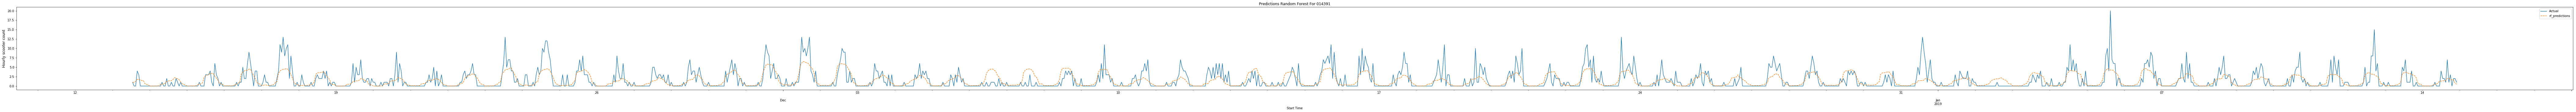

In [97]:
test_results.plot(style=['-', '--', ':'],figsize=(150, 5))
plt.title('Predictions Random Forest For 014391')
plt.ylabel('Hourly scooter count', fontsize=12)
plt.savefig('../../output/Random_Forest_Predictions_Commuter_Hours_014391.png')